In [1]:
import skimage
import skimage.io
import skimage.transform
import pathlib
import numpy as np
import utils
import matplotlib.pyplot as plt
image_dir = pathlib.Path("images")
impaths = [
    image_dir.joinpath("page1.png"),
    image_dir.joinpath("page2.png"),
    image_dir.joinpath("page4.png"),
    image_dir.joinpath("page6.png"),
    image_dir.joinpath("page7.png"),
    image_dir.joinpath("page8.png"),
]

In [ ]:
def create_binary_image(im):
    """Creates a binary image from a greyscale image "im"

    Args:
        im ([np.ndarray, np.float]): [An image of shape [H, W] in the range [0, 1]]

    Returns:
        [np.ndarray, bool]: [A binary image]
    """

    H, W = im.shape

    F = np.fft.fft2(im.astype(np.float32, copy=False))
    F_shift = np.fft.fftshift(F)
    mag = np.abs(F_shift)

    cy, cx = H // 2, W // 2
    yy, xx = np.ogrid[:H, :W]
    dc_radius = 10
    dc_mask = (yy - cy)**2 + (xx - cx)**2 <= dc_radius**2
    mag[dc_mask] = 0.0

    pad_mag = np.pad(mag, ((1,1),(1,1)), mode='constant', constant_values=0)
    blur = (
        pad_mag[0:-2,0:-2] + pad_mag[0:-2,1:-1] + pad_mag[0:-2,2:] +
        pad_mag[1:-1,0:-2] + pad_mag[1:-1,1:-1] + pad_mag[1:-1,2:] +
        pad_mag[2:  ,0:-2] + pad_mag[2:  ,1:-1] + pad_mag[2:  ,2:]
    ) / 9.0

    thr = 0.7 * np.max(blur) if np.max(blur) > 0 else 0.0
    binary_im = blur > thr

    return binary_im

Found angle: -22.31
Found angle: 90.00
Found angle: 26.82
Found angle: -25.32
Found angle: -67.44
Found angle: 89.50
Saving image to: image_processed/task4d.png


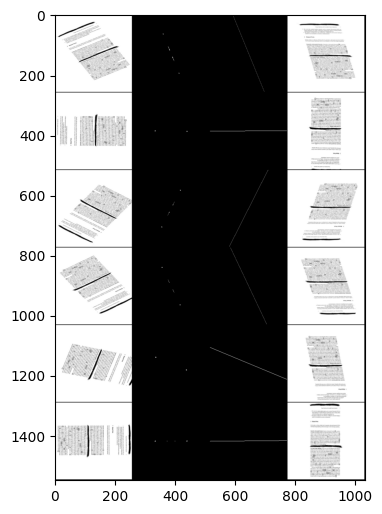

In [3]:
if __name__ == "__main__":
    # NO NEED TO EDIT THE CODE BELOW.
    verbose = True
    plt.figure(figsize=(4, 12))    
    plt.tight_layout()
    images_to_visualize = []
    for i, impath in enumerate(impaths):
        im = utils.read_im(str(impath))
        im_binary = create_binary_image(im)
        assert im_binary.dtype == bool,\
            f"Expected the image to be of dtype bool, got {im_binary.dtype}"
        angles, distances = utils.find_angle(im_binary)
        angle = 0
        if len(angles) > 0:
            angle = angles[0] * 180 / np.pi
        print(f"Found angle: {angle:.2f}")
        hough_im = utils.create_hough_line_image(im, angles, distances)
        rotated = skimage.transform.rotate(im, angle, cval=im.max())
        images_to_visualize.extend(
            [im, im_binary, hough_im, rotated]
        )
    image = utils.np_make_image_grid(images_to_visualize, nrow=len(impaths))
    utils.save_im("task4d.png", image)
    plt.imshow(image, cmap="gray")